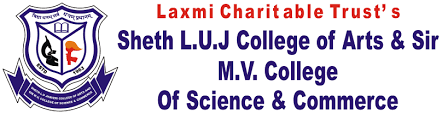

**RAM KUMAR SINGH T118**

PRACTICAL NO.8

AIM: K-Means Clustering

1)Apply the K-Means algorithm to group similar data points into clusters.

2)Determine the optimal number of clusters using elbow method or silhouee analysis.

3)Visualize the clustering results and analyze the cluster characteristics.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv("Mall_Customers.csv")

print("Dataset Head:")
print(df.head())

print("\nDataset Shape:", df.shape)

print("\nDataset Null Values:")
print(df.isnull().sum())

print("\nLoading and preparing data...")
print(f"Original loaded rows: {len(df)}")

Dataset Head:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Shape: (200, 5)

Dataset Null Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Loading and preparing data...
Original loaded rows: 200


In [3]:
# Select only numeric columns (same logic as PDF)
X = df.select_dtypes(include=['int64', 'float64'])

print(f"Numeric rows used for clustering: {X.shape[0]}")

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Numeric rows used for clustering: 200


In [4]:
wcss = []
sil_scores = []

k_range_start = 1
k_range_end = 11

print("\nEvaluating K range...")

for k in range(k_range_start, k_range_end):
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)

    inertia = kmeans.inertia_
    wcss.append(inertia)

    if k > 1:
        sil = silhouette_score(X_scaled, kmeans.labels_)
        sil_scores.append(sil)
    else:
        sil = float("nan")

    print(f"Evaluated K={k}: inertia={inertia:.4f}, silhouette={sil:.4f}")


Evaluating K range...
Evaluated K=1: inertia=800.0000, silhouette=nan
Evaluated K=2: inertia=515.6689, silhouette=0.3185
Evaluated K=3: inertia=375.2627, silhouette=0.3363
Evaluated K=4: inertia=259.6936, silhouette=0.4140
Evaluated K=5: inertia=209.5784, silhouette=0.4272
Evaluated K=6: inertia=160.9757, silhouette=0.4390
Evaluated K=7: inertia=144.6882, silhouette=0.4186
Evaluated K=8: inertia=129.4191, silhouette=0.4055
Evaluated K=9: inertia=117.5938, silhouette=0.3731
Evaluated K=10: inertia=103.3997, silhouette=0.3899


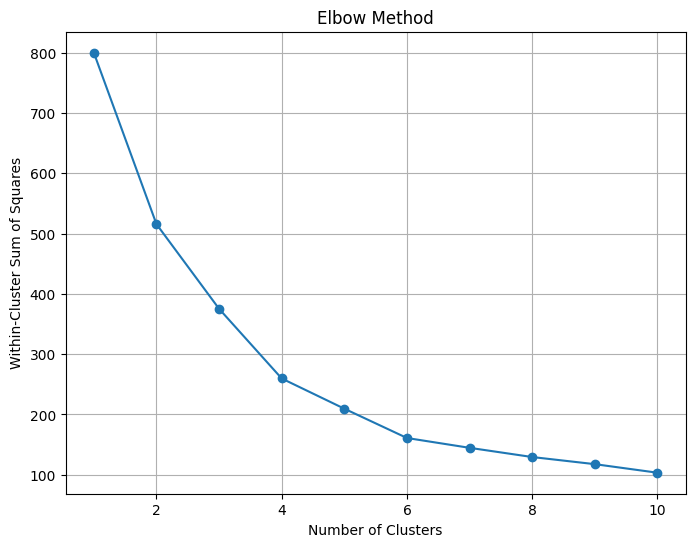

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(range(k_range_start, k_range_end), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.grid(True)
plt.show()

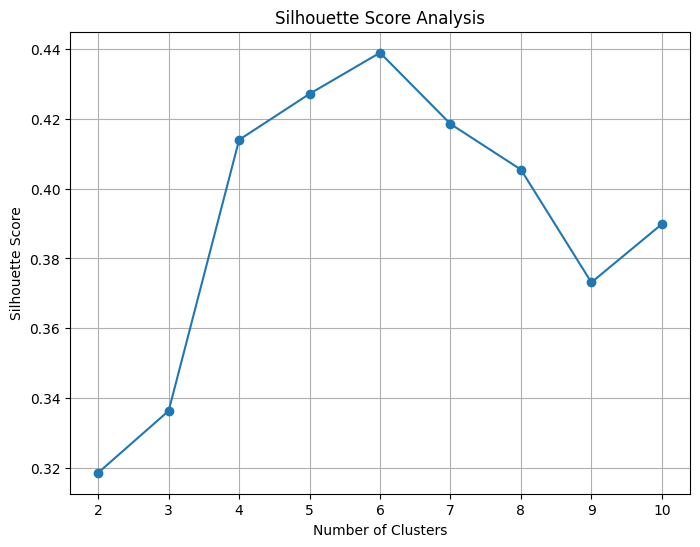

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, k_range_end), sil_scores, marker='o')
plt.title("Silhouette Score Analysis")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [7]:
kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    random_state=42,
    n_init=10
)

labels = kmeans.fit_predict(X_scaled)

print(f"\nSSE for K={kmeans.n_clusters}: {kmeans.inertia_}")
print(f"Silhouette score for K={kmeans.n_clusters}: {silhouette_score(X_scaled, labels):.4f}")



SSE for K=3: 375.2627107440475
Silhouette score for K=3: 0.3363


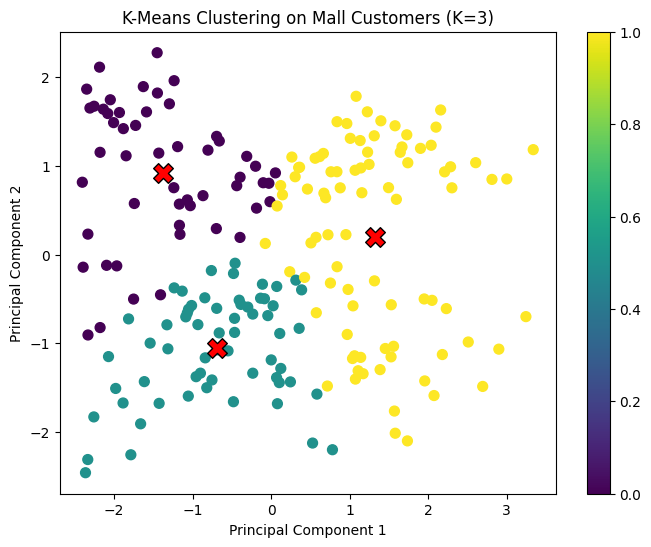

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, edgecolor='k')
plt.title(f"K-Means Clustering on Mall Customers (K={kmeans.n_clusters})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

In [9]:
cluster_df = df.copy()
cluster_df['cluster'] = labels

for c in sorted(cluster_df['cluster'].unique()):
    print(f"\nCluster {c} Characteristics:\n")
    print(cluster_df[cluster_df['cluster'] == c].describe())



Cluster 0 Characteristics:

       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   52.000000  52.000000           52.000000               52.000000   
mean    41.384615  26.807692           34.884615               59.211538   
std     29.576192   6.299824           14.660409               21.961943   
min      1.000000  18.000000           15.000000                6.000000   
25%     16.750000  21.000000           20.750000               47.000000   
50%     37.000000  25.500000           33.500000               59.000000   
75%     63.000000  31.250000           46.500000               75.250000   
max    100.000000  40.000000           61.000000               99.000000   

       cluster  
count     52.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

Cluster 1 Characteristics:

       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   62.000000  62.000000